In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('D:\ineuron Datasets\Algerian_forest_fires_dataset_UPDATE.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Algerian Forest Fire Dataset

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,245,245,245,245,245,245,245,245,245,245,245,245,245,244,245
unique,32,5,2,20,63,19,40,174,167,199,107,175,127,9,3
top,8,8,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       245 non-null    object
dtypes: object(15)
memory usage: 29.1+ KB


In [8]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 15 categorical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region']


In [9]:
print(df.columns.tolist())

['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region']


In [10]:
df['day'] = df['day'].str.strip()
df['month'] = df['month'].str.strip()
df['year'] = df['year'].str.strip()
df['Temperature'] = df['Temperature'].str.strip()
df['RH'] = df[' RH'].str.strip()
df['Ws'] = df[' Ws'].str.strip()
df['Rain '] = df['Rain '].str.strip()
df['FFMC'] = df['FFMC'].str.strip()
df['DMC'] = df['DMC'].str.strip()
df['DC'] = df['DC'].str.strip()
df['ISI'] = df['ISI'].str.strip()
df['BUI'] = df['BUI'].str.strip()
df['FWI'] = df['FWI'].str.strip()
df['Region'] = df['Region'].str.strip()


In [11]:
df.dropna(inplace = True)
df = df[df['day'] != 'day']

In [12]:
df['day'] = df['day'].astype('float').astype('Int64')
df['month'] = df['month'].astype('float').astype('Int64')
df['year'] = df['year'].astype('float').astype('Int64')
df['Temperature'] = df['Temperature'].astype('float').astype('Int64') 
df['RH'] = df['RH'].astype('float').astype('Int64')
df['Ws'] = df['Ws'].astype('float').astype('Int64')
df['Ws'] = df['Ws'].astype('float').astype('Int64')
df['Ws'] = df['Ws'].astype('float').astype('Int64')
df['Rain '] = df['Rain '].astype('float').astype('int64')
df['FFMC'] = df['FFMC'].astype('float').astype('int64')
df['DMC'] = df['DMC'].astype('float').astype('int64')
df['DC'] = df['DC'].astype('float').astype('int64')
df['ISI'] = df['ISI'].astype('float').astype('int64')
df['BUI'] = df['BUI'].astype('float').astype('int64')
df['FWI'] = df['FWI'].astype('float').astype('int64')
df['Region'] = df['Region'].astype('float').astype('int64')


In [13]:
df.isnull().any()

day            False
month          False
year           False
Temperature    False
 RH            False
 Ws            False
Rain           False
FFMC           False
DMC            False
DC             False
ISI            False
BUI            False
FWI            False
Classes        False
Region         False
RH             False
Ws             False
dtype: bool

In [14]:
df.dtypes

day             Int64
month           Int64
year            Int64
Temperature     Int64
 RH            object
 Ws            object
Rain            int64
FFMC            int64
DMC             int64
DC              int64
ISI             int64
BUI             int64
FWI             int64
Classes        object
Region          int64
RH              Int64
Ws              Int64
dtype: object

In [15]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

1     3.292181
17    3.292181
3     3.292181
4     3.292181
5     3.292181
6     3.292181
7     3.292181
8     3.292181
9     3.292181
10    3.292181
11    3.292181
12    3.292181
13    3.292181
15    3.292181
2     3.292181
16    3.292181
18    3.292181
19    3.292181
20    3.292181
21    3.292181
22    3.292181
23    3.292181
24    3.292181
25    3.292181
26    3.292181
27    3.292181
28    3.292181
29    3.292181
30    3.292181
14    2.880658
31    1.646091
Name: day, dtype: Float64
---------------------------
8    25.514403
7    25.102881
6    24.691358
9    24.691358
Name: month, dtype: Float64
---------------------------
2012    100.0
Name: year, dtype: Float64
---------------------------
35    11.934156
31    10.288066
34     9.876543
33     9.465021
30     9.053498
36     8.641975
32     8.641975
29     7.407407
28      6.17284
37     3.292181
27     3.292181
25     2.469136
39     2.469136
26     2.057613
40     1.234568
24     1.234568
38     1.234568
22     0.823045
42     0

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,RH,Ws
0,1,6,2012,29,57,18,0,65,3,7,1,3,0,not fire,0,57,18
1,2,6,2012,29,61,13,1,64,4,7,1,3,0,not fire,0,61,13
2,3,6,2012,26,82,22,13,47,2,7,0,2,0,not fire,0,82,22
3,4,6,2012,25,89,13,2,28,1,6,0,1,0,not fire,0,89,13
4,5,6,2012,27,77,16,0,64,3,14,1,3,0,not fire,0,77,16


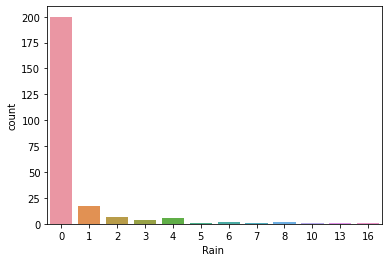

In [18]:
sns.countplot(df['Rain '])
plt.show()

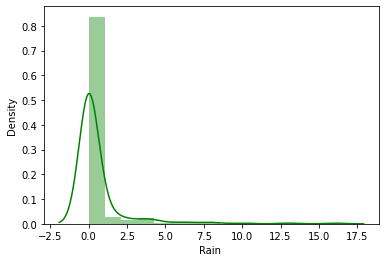

In [19]:

sns.distplot(df['Rain '],hist = True,kde=True,color='g')
plt.show()

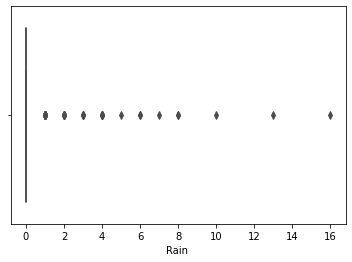

In [20]:
sns.boxplot(df['Rain '],color='r')
plt.show()

In [21]:
df[(list(df.columns)[1:])].corr()


,month,year,Temperature,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,RH,Ws
month,1.000000,NaN,-0.056781,0.036179,0.016199,0.066828,0.127069,0.068762,0.087670,0.079515,0.001857,-0.041252,-0.039880
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,-0.056781,NaN,1.000000,-0.322351,0.677443,0.485904,0.376003,0.601893,0.457610,0.561140,0.269555,-0.651400,-0.284510
Rain,0.036179,NaN,-0.322351,1.000000,-0.496339,-0.253027,-0.268250,-0.294768,-0.265361,-0.270804,-0.033145,0.212946,0.170238
FFMC,0.016199,NaN,0.677443,-0.496339,1.000000,0.604157,0.507689,0.729235,0.592232,0.679905,0.222804,-0.644674,-0.166354
DMC,0.066828,NaN,0.485904,-0.253027,0.604157,1.000000,0.875447,0.680604,0.981594,0.875854,0.191430,-0.409140,0.000571
DC,0.127069,NaN,0.376003,-0.268250,0.507689,0.875447,1.000000,0.502481,0.941716,0.738373,-0.078271,-0.226695,0.078934
ISI,0.068762,NaN,0.601893,-0.294768,0.729235,0.680604,0.502481,1.000000,0.640407,0.918229,0.269143,-0.685212,0.005143
BUI,0.087670,NaN,0.457610,-0.265361,0.592232,0.981594,0.941716,0.640407,1.000000,0.856439,0.089234,-0.350936,0.031714
FWI,0.079515,NaN,0.561140,-0.270804,0.679905,0.875854,0.738373,0.918229,0.856439,1.000000,0.197529,-0.573959,0.037493


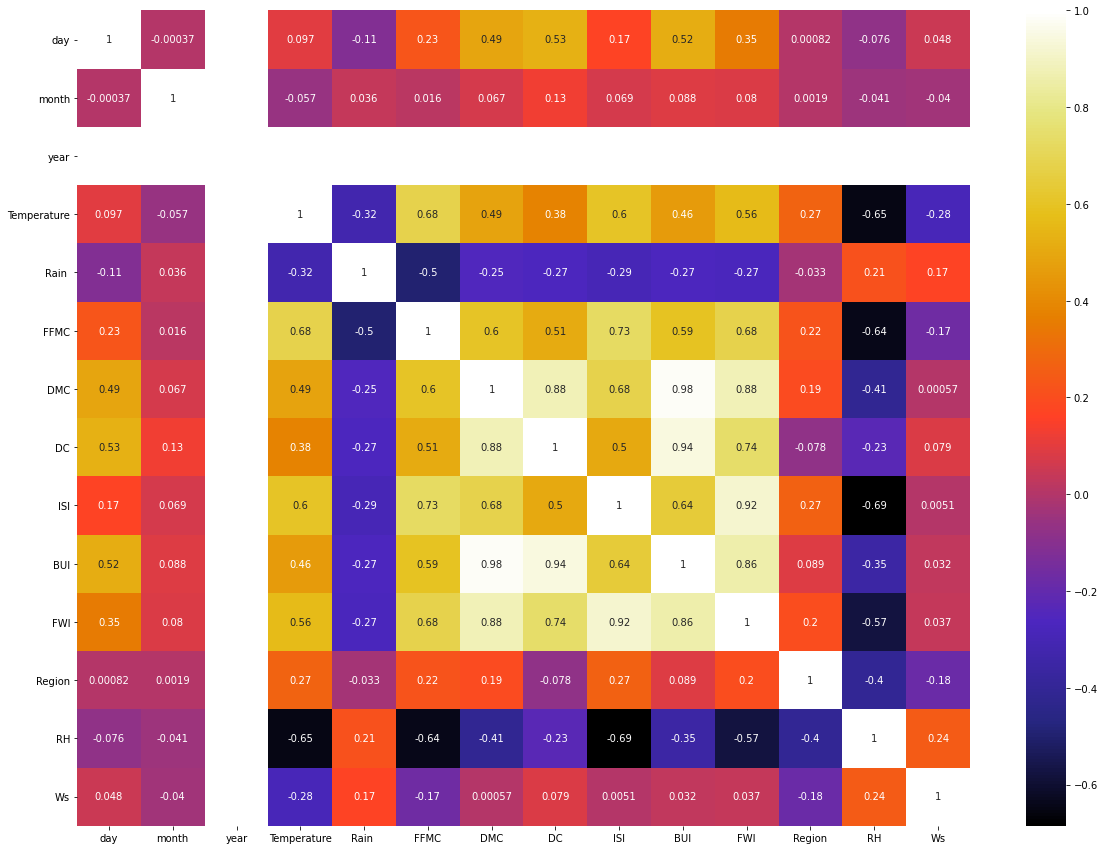

In [22]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [23]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : []


<AxesSubplot:xlabel='Rain ', ylabel='Classes  '>

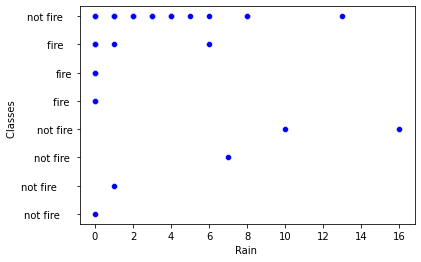

In [24]:
sns.scatterplot(data= df ,x=df['Rain '], y=df['Classes  '] , color='b')

In [25]:
df['Classes  '] =df['Classes  '].apply(lambda x:x.strip())#important

In [26]:
#mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
#mileage.to_frame()

In [27]:
#sns.barplot(x=df.Temperature.index, y=df.Temperature.values, ec = "black", palette="Set2")

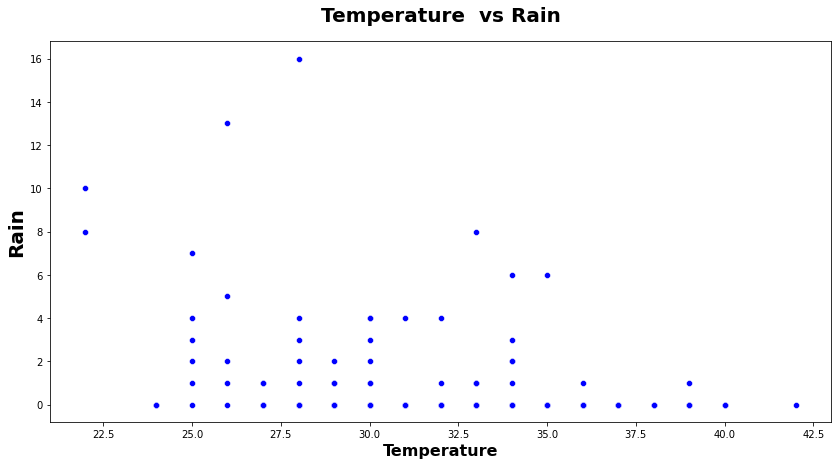

In [28]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Temperature", y='Rain ', data=df,ec = "white",color='b')
plt.title("Temperature  vs Rain", weight="bold",fontsize=20, pad=20)
plt.ylabel("Rain", weight="bold", fontsize=20)

plt.xlabel("Temperature", weight="bold", fontsize=16)
plt.show()

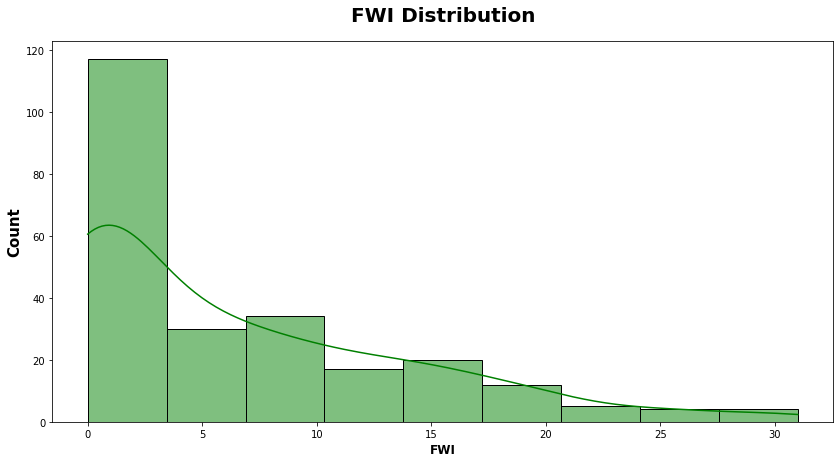

In [29]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.FWI, ec = "black", color='g', kde=True)
plt.title("FWI Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("FWI", weight="bold", fontsize=12)
plt.show()

In [30]:
df.dtypes

day             Int64
month           Int64
year            Int64
Temperature     Int64
 RH            object
 Ws            object
Rain            int64
FFMC            int64
DMC             int64
DC              int64
ISI             int64
BUI             int64
FWI             int64
Classes        object
Region          int64
RH              Int64
Ws              Int64
dtype: object

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# apply on df
color_1hot = encoder.fit_transform(df['Classes  '].values.reshape(-1,1))

In [32]:
print(color_1hot)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (218, 1)	1.0
  (219, 0)	1.0
  (220, 0)	1.0
  (221, 0)	1.0
  (222, 1)	1.0
  (223, 1)	1.0
  (224, 0)	1.0
  (225, 0)	1.0
  (226, 0)	1.0
  (227, 0)	1.0
  (228, 0)	1.0
  (229, 0)	1.0
  (230, 0)	1.0
  (231, 0)	1.0
  (232, 1)	1.0
  (233, 0)	1.0
  (234, 0)	1.0
  (235, 0)	1.0
  (236, 1)	1.0
  (237, 1)	1.0
  (238, 0)	1.0
  (239, 1)	1.0
  (240, 1)	1.0
  (241, 1)	1.0
  (242, 1)	1.0


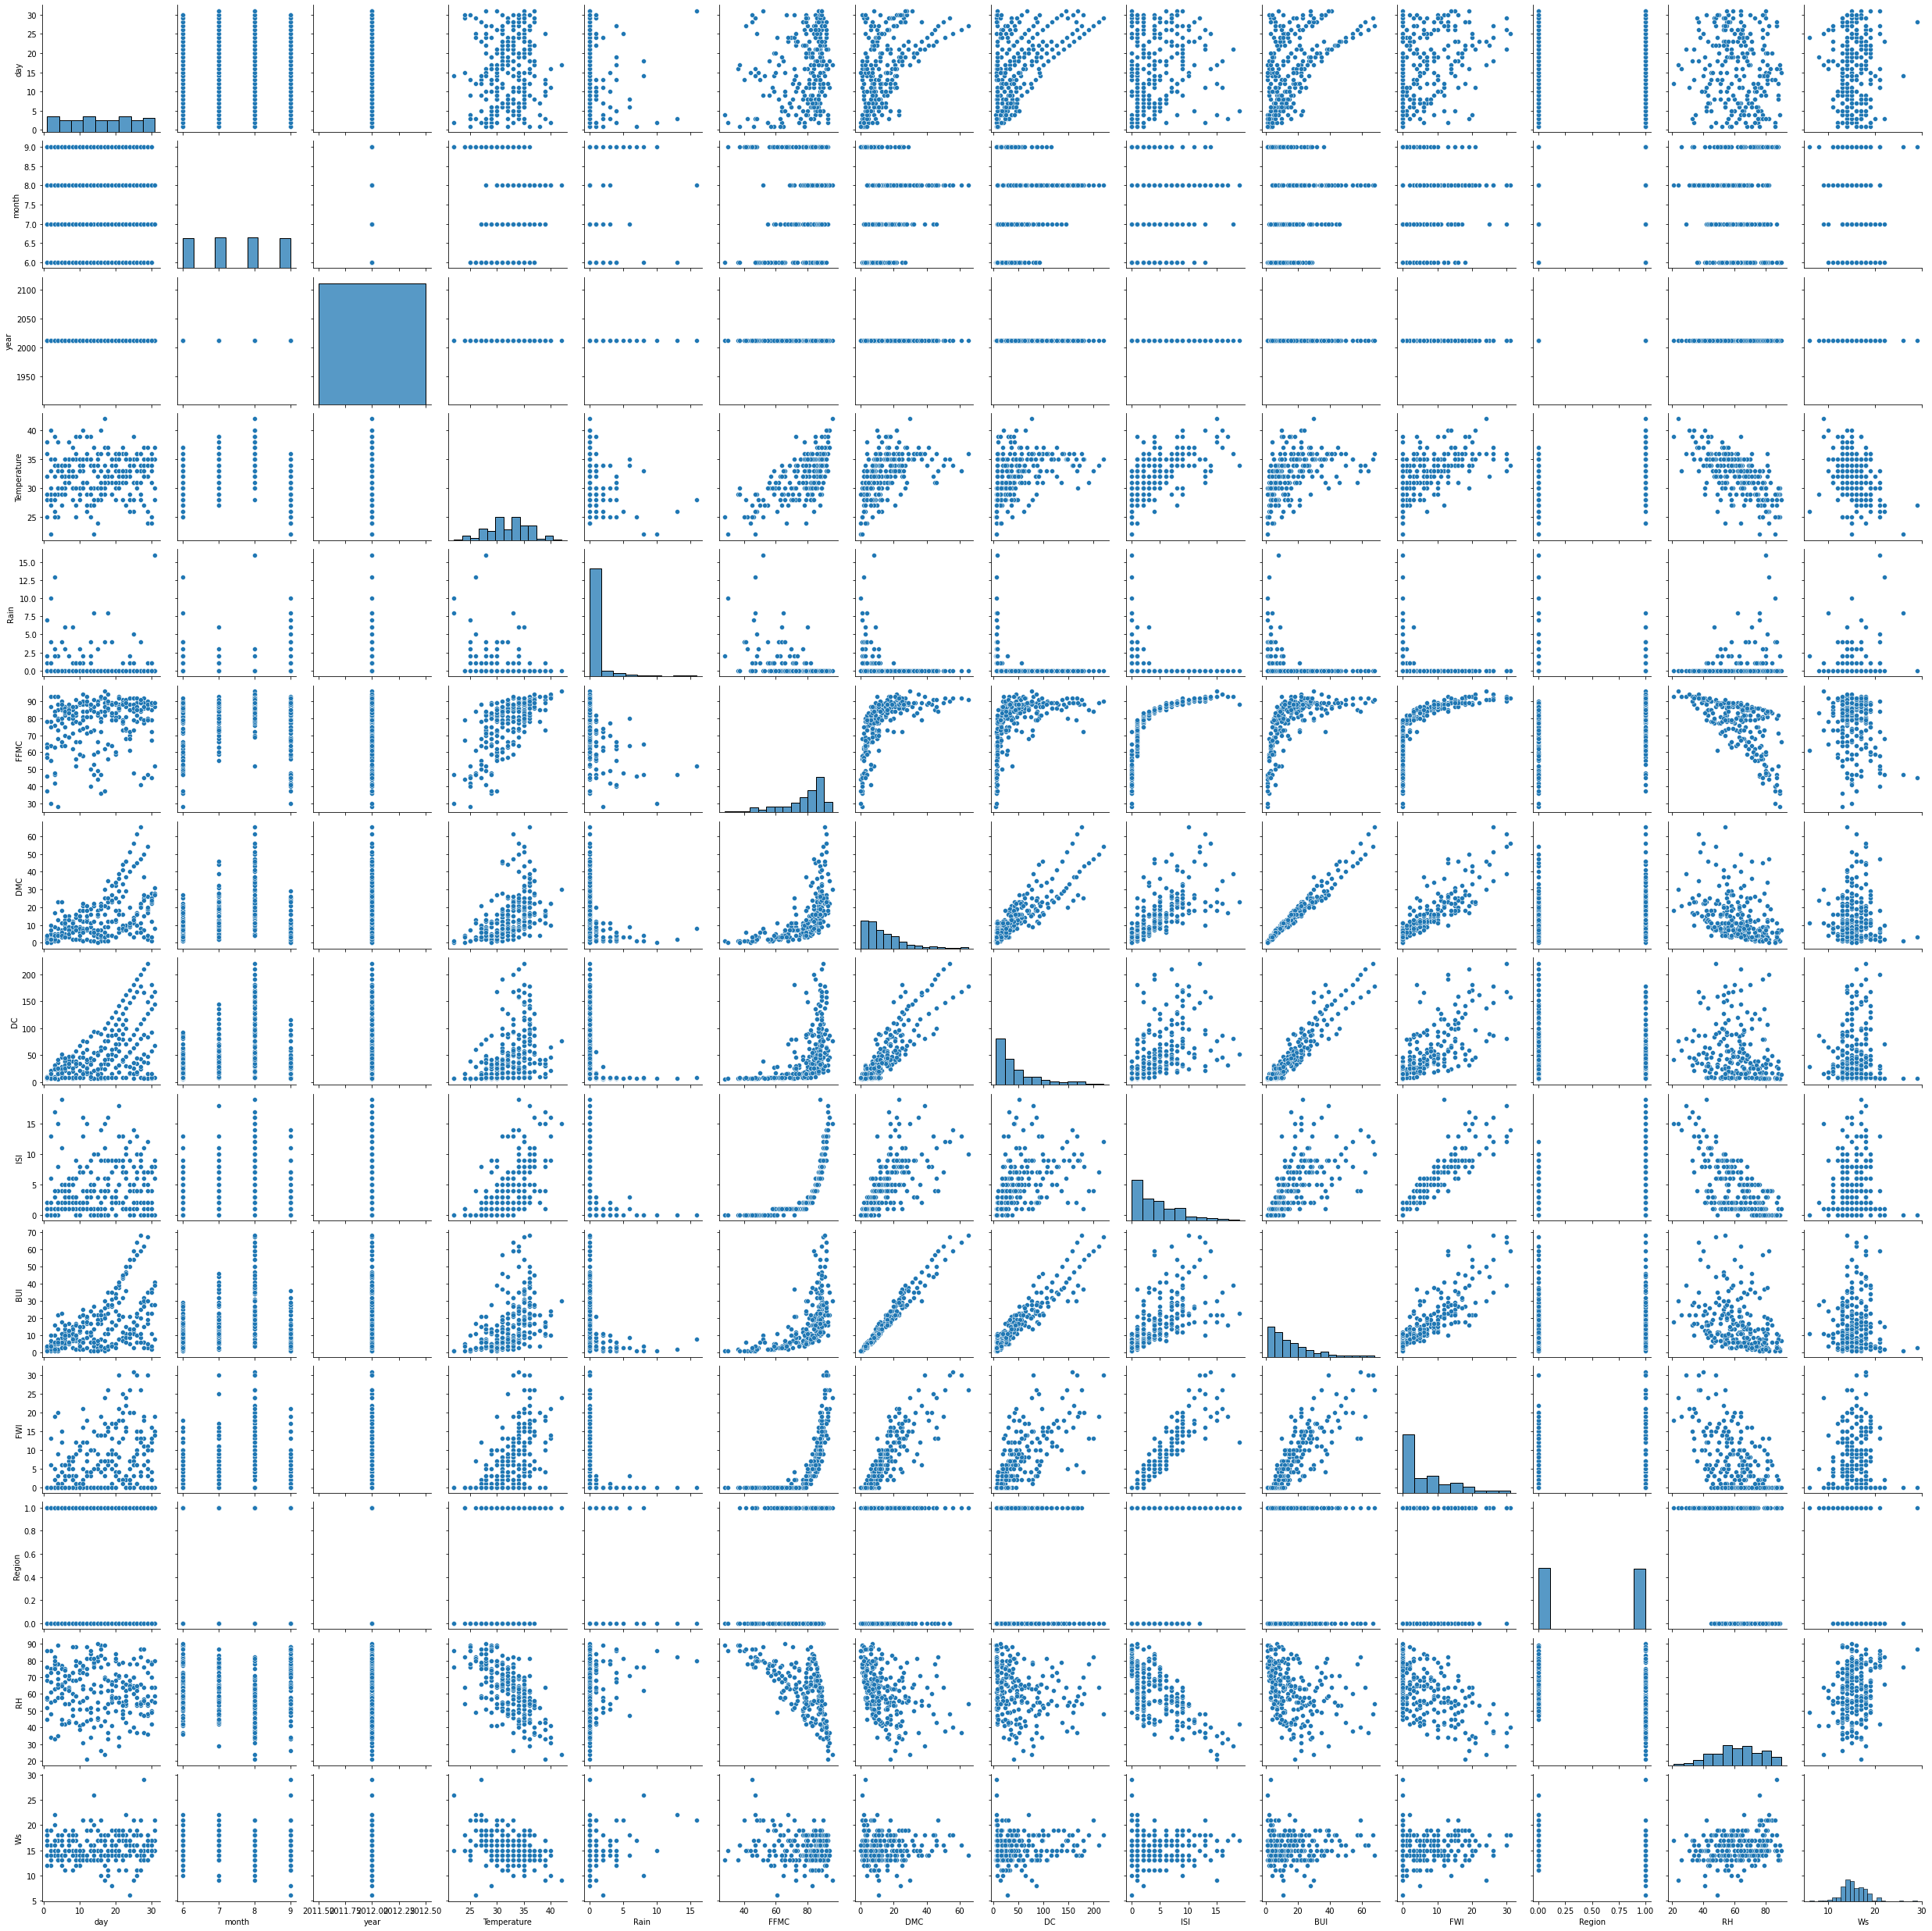

In [33]:
sns.pairplot(df)

In [51]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'RH', 'Ws'],
      dtype='object')

In [55]:
X=df.drop(columns=['Temperature','Classes  '],axis=1)

In [56]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,RH,Ws
0,1,6,2012,57,18,0,65,3,7,1,3,0,0,57,18
1,2,6,2012,61,13,1,64,4,7,1,3,0,0,61,13
2,3,6,2012,82,22,13,47,2,7,0,2,0,0,82,22
3,4,6,2012,89,13,2,28,1,6,0,1,0,0,89,13
4,5,6,2012,77,16,0,64,3,14,1,3,0,0,77,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,65,14,0,85,16,44,4,16,6,1,65,14
243,27,9,2012,87,15,4,41,6,8,0,6,0,1,87,15
244,28,9,2012,87,29,0,45,3,7,0,3,0,1,87,29
245,29,9,2012,54,18,0,79,4,15,1,5,0,1,54,18


In [57]:
Y = df['Temperature']

In [58]:
Y

0      29
1      29
2      26
3      25
4      27
       ..
242    30
243    28
244    27
245    24
246    24
Name: Temperature, Length: 243, dtype: Int64

In [59]:
#sns.regplot(x = X, y = Y, data = df)
#plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=10)

In [62]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)#To prevent data leakage with mean and standard deviation

In [64]:
X_train

array([[ 1.30705791, -1.39305207,  0.        , ..., -1.01242284,
         0.06835876,  0.89673457],
       [ 1.77217242,  1.29354835,  0.        , ..., -1.01242284,
         0.99672801, -0.58185068],
       [ 0.95822202, -0.4975186 ,  0.        , ...,  0.9877296 ,
         0.53254338,  0.52708826],
       ...,
       [ 0.14427163,  1.29354835,  0.        , ...,  0.9877296 ,
        -2.45150064, -0.95149699],
       [-1.2510719 , -1.39305207,  0.        , ...,  0.9877296 ,
         0.06835876, -0.58185068],
       [-0.55340014, -1.39305207,  0.        , ..., -1.01242284,
         1.0630401 , -1.3211433 ]])

In [65]:
X_test

array([[ 0.26055026, -0.4975186 ,  0.        , ..., -1.01242284,
         0.46623129, -0.58185068],
       [-0.20456425,  1.29354835,  0.        , ...,  0.9877296 ,
        -0.92632258,  1.26638088],
       [ 1.77217242, -0.4975186 ,  0.        , ...,  0.9877296 ,
        -0.46213796,  0.15744195],
       ...,
       [ 1.30705791,  0.39801488,  0.        , ...,  0.9877296 ,
        -1.72206765,  0.15744195],
       [-0.43712151,  1.29354835,  0.        , ..., -1.01242284,
         0.93041592,  2.0056735 ],
       [ 0.37682889,  0.39801488,  0.        , ..., -1.01242284,
        -0.59476213,  0.89673457]])

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
regression=LinearRegression()

In [68]:
regression

LinearRegression()

In [70]:
regression.fit(X_train,Y_train)

LinearRegression()

In [71]:
## print the coefficients and the intercept
print(regression.coef_)

[-3.79932446e-01 -2.16874129e-01 -6.66133815e-16 -7.19299128e-01
 -3.54128707e-01 -3.28763626e-01  9.51198621e-01  1.31236513e-01
  7.18749447e-01 -2.91342579e-02 -6.61184028e-02 -2.79556437e-02
  2.45622474e-01 -7.19299128e-01 -3.54128707e-01]


In [72]:
print(regression.intercept_)

32.074074074074076


In [73]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [74]:
reg_pred

array([31.80316725, 33.08721357, 33.28153675, 24.62219251, 29.19946195,
       33.66959058, 31.81449108, 34.60485072, 31.72983211, 32.44276484,
       33.64827876, 33.29717421, 35.72502843, 31.89258258, 34.0508012 ,
       33.24368488, 26.58890308, 36.0288929 , 33.16708926, 22.70928388,
       32.1824273 , 32.42327248, 32.99836697, 32.81415054, 30.08581741,
       32.64750653, 33.06195449, 32.30836837, 32.16501788, 33.93250017,
       34.51210792, 33.73761507, 34.38998929, 32.63324354, 30.97356406,
       28.83058412, 32.61333876, 31.88069156, 33.06211842, 34.08284617,
       33.83649368, 35.53375209, 34.21853837, 37.08915384, 32.87101999,
       36.73886908, 32.37323961, 35.32079826, 30.8079389 , 30.9411369 ,
       32.2748118 , 39.28971515, 32.56654099, 34.54752035, 27.28042624,
       37.02870724, 33.80143997, 33.85320773, 29.12183754, 32.25903936,
       32.41228107, 32.0459186 , 24.1244169 , 36.32275478, 36.12537969,
       29.20279256, 29.51491791, 29.33271232, 36.09827144, 28.69

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(X_train,Y_train)

In [ ]:
print(regression.coef_)

In [ ]:
print(regression.intercept_)

In [ ]:
plt.scatter(Y_test,reg_pred)